In [14]:
import matplotlib.pyplot as plt
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, tolerance=1e-6, cost_function='mse'):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.tolerance = tolerance  # Stop early if gradient updates are very small
        self.weights = None
        self.bias = 0
        self.loss_history = []  # Store loss for visualization
        self.history = []  # Store weight and bias updates
        self.cost_function = cost_function  # Choose cost function

    def mse(self, y, y_hat):
        return sum((y_hat[i] - y[i]) ** 2 for i in range(len(y))) / len(y)

    def mae(self, y, y_hat):
        return sum(abs(y_hat[i] - y[i]) for i in range(len(y))) / len(y)

    def huber_loss(self, y, y_hat, delta=1.0):
        loss = 0
        for i in range(len(y)):
            error = y_hat[i] - y[i]
            if abs(error) <= delta:
                loss += 0.5 * error ** 2
            else:
                loss += delta * (abs(error) - 0.5 * delta)
        return loss / len(y)

    def compute_loss(self, y, y_hat):
        if self.cost_function == 'mse':
            return self.mse(y, y_hat)
        elif self.cost_function == 'mae':
            return self.mae(y, y_hat)
        elif self.cost_function == 'huber':
            return self.huber_loss(y, y_hat)
        else:
            raise ValueError("Invalid cost function. Choose from 'mse', 'mae', or 'huber'.")

    def compute_y_hat(self, x):
        return sum(x[i] * self.weights[i] for i in range(len(self.weights))) + self.bias

    def compute_gradients(self, X, y):
        n_samples = len(X)
        n_features = len(X[0])
        dw = [0] * n_features
        db = 0

        for j in range(n_samples):
            y_pred = self.compute_y_hat(X[j])
            error = y[j] - y_pred
            for i in range(n_features):
                dw[i] += error * X[j][i]
            db += error

        dw = [-(2 / n_samples) * dwi for dwi in dw]
        db *= -(2 / n_samples)

        return dw, db

    def descent(self, dw, db):
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * dw[i]
        self.bias -= self.learning_rate * db

    def fit(self, X, y):
        n_features = len(X[0])
        self.weights = [0] * n_features
        prev_dw, prev_db = [float('inf')] * n_features, float('inf')  # Track previous gradients

        for epoch in range(self.epochs):
            dw, db = self.compute_gradients(X, y)

            # Simple early stopping: Check if gradient change is small
            if all(abs(dw[i] - prev_dw[i]) < self.tolerance for i in range(n_features)) and abs(db - prev_db) < self.tolerance:
                print(f'Converged at epoch {epoch}')
                break

            self.descent(dw, db)
            prev_dw, prev_db = dw, db  # Store previous gradients

            # Store weight, bias, and loss for visualization
            y_pred = self.predict(X)
            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)
            self.history.append((self.weights[:], self.bias))

    def predict(self, X):
        return [self.compute_y_hat(x) for x in X]

    def visualize_training(self, X, y):
        plt.figure(figsize=(12, 5))

        # Plot loss over epochs
        plt.subplot(1, 2, 1)
        plt.plot(range(len(self.loss_history)), self.loss_history, color='red')
        plt.xlabel("Epochs")
        plt.ylabel(f"{self.cost_function.upper()} Loss")
        plt.title("Loss Over Iterations")

        # Plot regression line evolution (only for the first feature)
        plt.subplot(1, 2, 2)
        x_vals = [x[0] for x in X]  # Use only the first feature for visualization
        plt.scatter(x_vals, y, color='blue', label='Actual Data')

        for i, (weights, b) in enumerate(self.history[::max(1, len(self.history)//10)]):
            y_vals = [sum(weights[j] * x[j] for j in range(len(weights))) + b for x in X]
            plt.plot(x_vals, y_vals, color='gray', alpha=0.3, linestyle='dashed')

        # Final regression line
        y_final = [sum(self.weights[j] * x[j] for j in range(len(self.weights))) + self.bias for x in X]
        plt.plot(x_vals, y_final, color='red', label='Final Fit')

        plt.xlabel("Feature Value (First Feature)")
        plt.ylabel("Target Value")
        plt.title("Regression Line Evolution")
        plt.legend()

        plt.show()




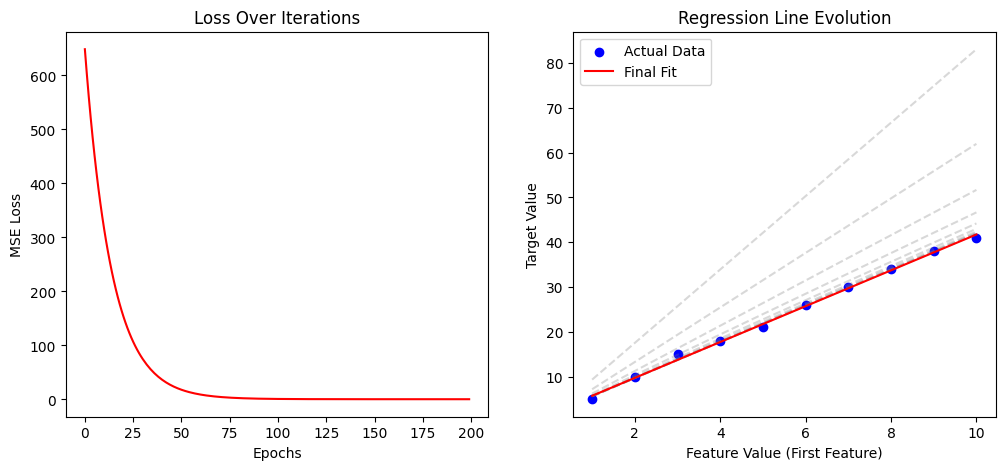

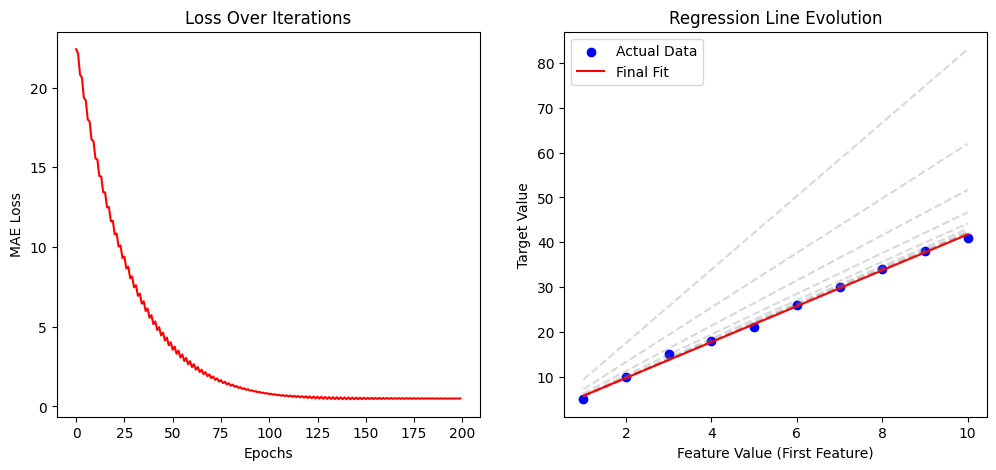

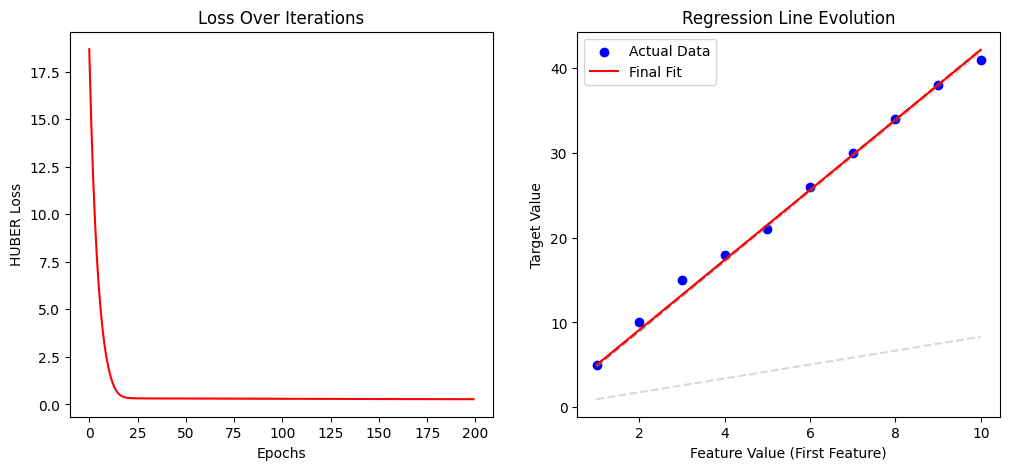

MSE Final Loss: 0.3611199054455808
MAE Final Loss: 0.5008076553323937
Huber Final Loss: 0.27314707451981296


In [17]:
X = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]  # Single feature values
y = [5, 10, 15, 18, 21, 26, 30, 34, 38, 41]  # y = 4x + 2 with slight variations

# Try different cost functions
model_mse = LinearRegression(learning_rate=0.025, epochs=200, cost_function='mse')
model_mse.fit(X, y)
model_mse.visualize_training(X, y)

model_mae = LinearRegression(learning_rate=0.025, epochs=200, cost_function='mae')
model_mae.fit(X, y)
model_mae.visualize_training(X, y)

model_huber = LinearRegression(learning_rate=0.0025, epochs=200, cost_function='huber')
model_huber.fit(X, y)
model_huber.visualize_training(X, y)

print(f"MSE Final Loss: {model_mse.loss_history[-1]}")
print(f"MAE Final Loss: {model_mae.loss_history[-1]}")
print(f"Huber Final Loss: {model_huber.loss_history[-1]}")


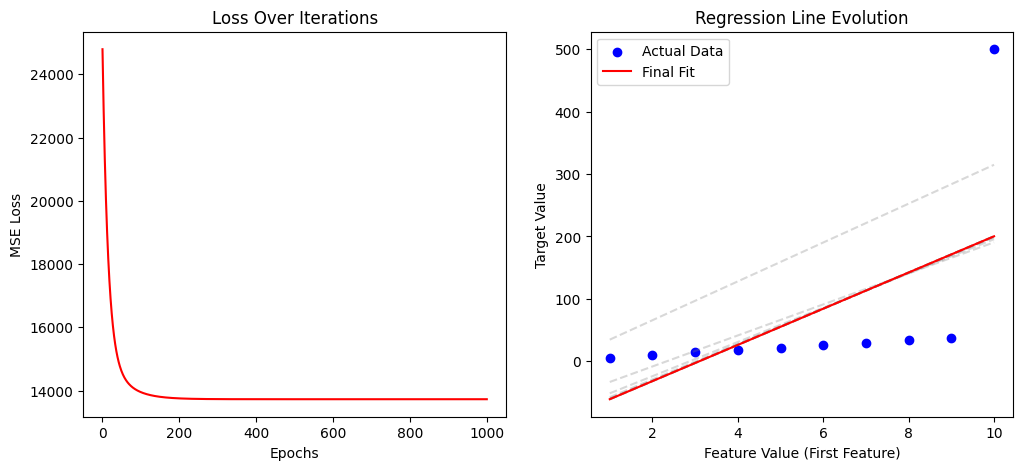

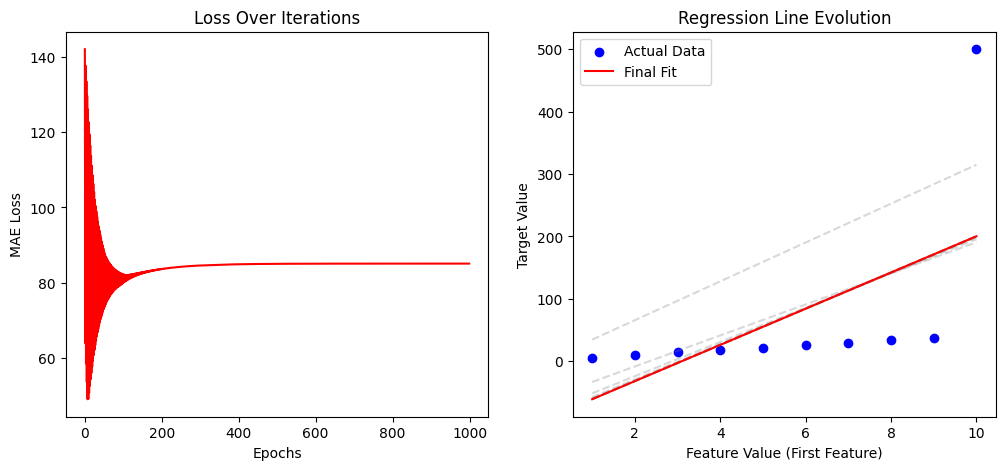

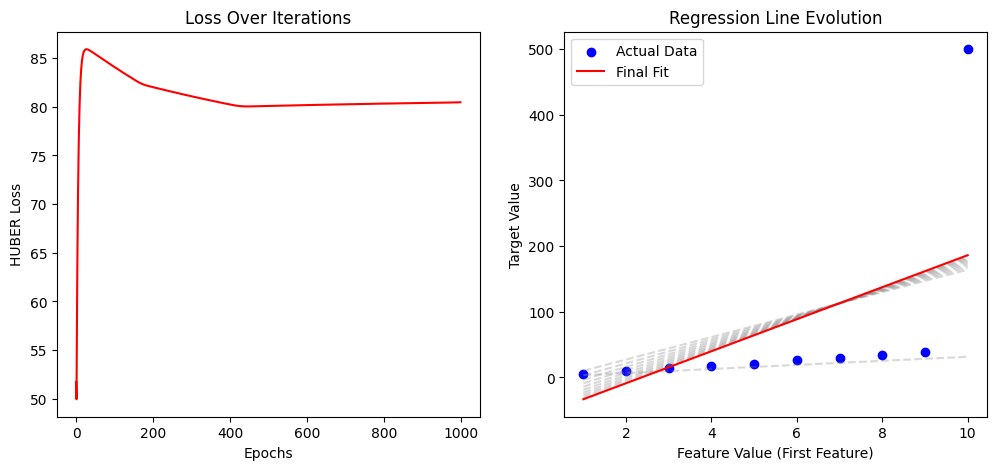

MSE Final Loss: 13726.958789116103
MAE Final Loss: 85.05423219243029
Huber Final Loss: 80.46692888016783


In [21]:
X = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
y = [5, 10, 15, 18, 21, 26, 30, 34, 38, 500]  # Outlier at 500


# Try different cost functions
model_mse = LinearRegression(learning_rate=0.025, epochs=1000, cost_function='mse')
model_mse.fit(X, y)
model_mse.visualize_training(X, y)

model_mae = LinearRegression(learning_rate=0.025, epochs=1000, cost_function='mae')
model_mae.fit(X, y)
model_mae.visualize_training(X, y)

model_huber = LinearRegression(learning_rate=0.0025, epochs=1000, cost_function='huber')
model_huber.fit(X, y)
model_huber.visualize_training(X, y)
print(f"MSE Final Loss: {model_mse.loss_history[-1]}")
print(f"MAE Final Loss: {model_mae.loss_history[-1]}")
print(f"Huber Final Loss: {model_huber.loss_history[-1]}")

#huber performs the best in the case of the outlier, not only does it have the least loss it

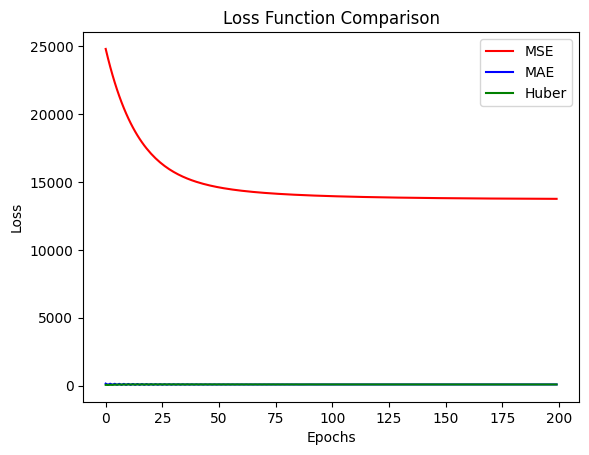

In [19]:
plt.plot(model_mse.loss_history, label='MSE', color='red')
plt.plot(model_mae.loss_history, label='MAE', color='blue')
plt.plot(model_huber.loss_history, label='Huber', color='green')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Function Comparison')
plt.show()


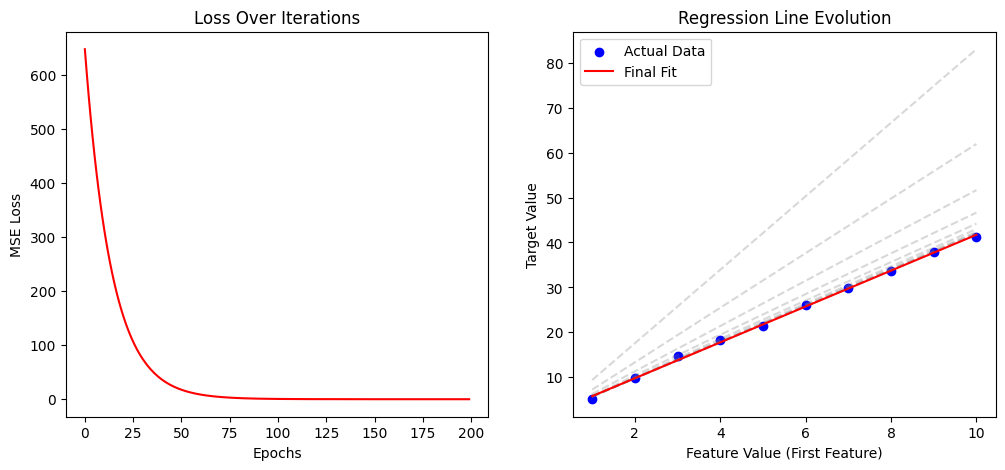

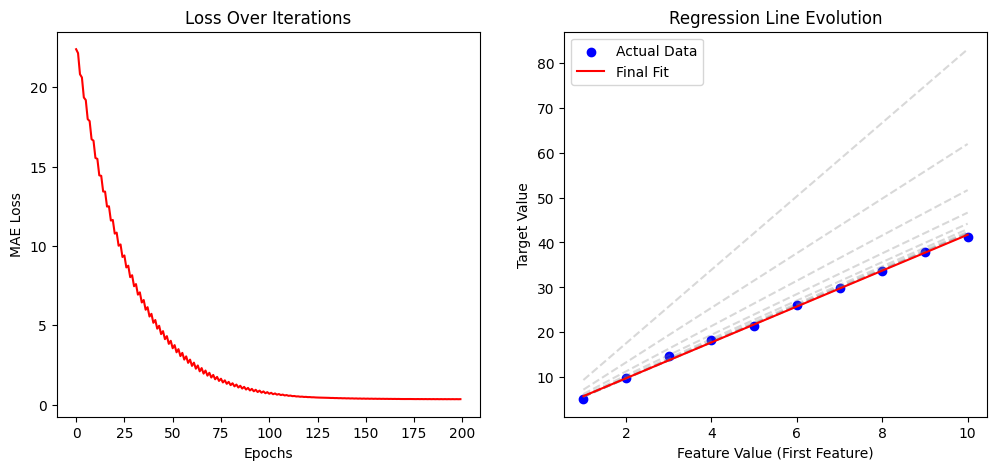

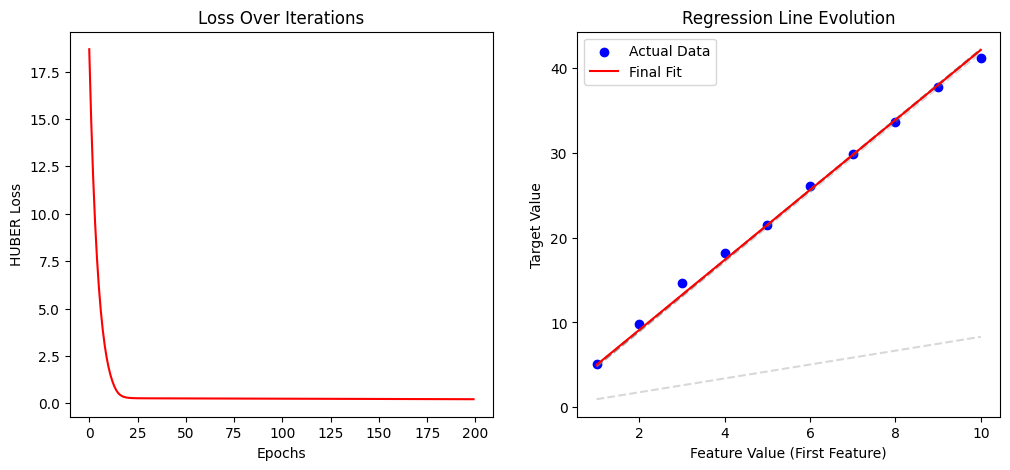

MSE Final Loss: 0.20221472547843558
MAE Final Loss: 0.34777650173401986
Huber Final Loss: 0.21564343813688183


In [20]:
X = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
y = [5.1, 9.8, 14.7, 18.2, 21.5, 26.1, 29.9, 33.7, 37.8, 41.2]  # Small noise
model_mse = LinearRegression(learning_rate=0.025, epochs=200, cost_function='mse')
model_mse.fit(X, y)
model_mse.visualize_training(X, y)

model_mae = LinearRegression(learning_rate=0.025, epochs=200, cost_function='mae')
model_mae.fit(X, y)
model_mae.visualize_training(X, y)

model_huber = LinearRegression(learning_rate=0.0025, epochs=200, cost_function='huber')
model_huber.fit(X, y)
model_huber.visualize_training(X, y)
print(f"MSE Final Loss: {model_mse.loss_history[-1]}")
print(f"MAE Final Loss: {model_mae.loss_history[-1]}")
print(f"Huber Final Loss: {model_huber.loss_history[-1]}")
#mse gives the least cost in the case of noise but huber comes to this conclusion in the least amount of epochs

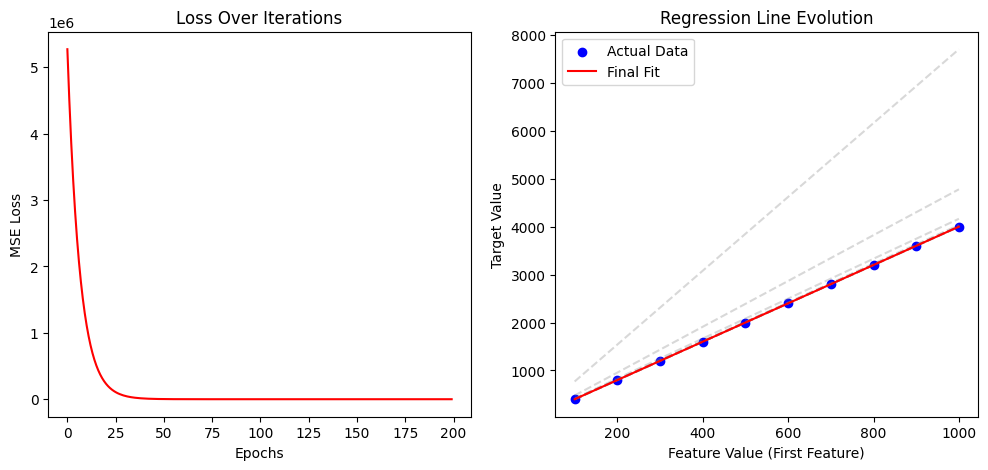

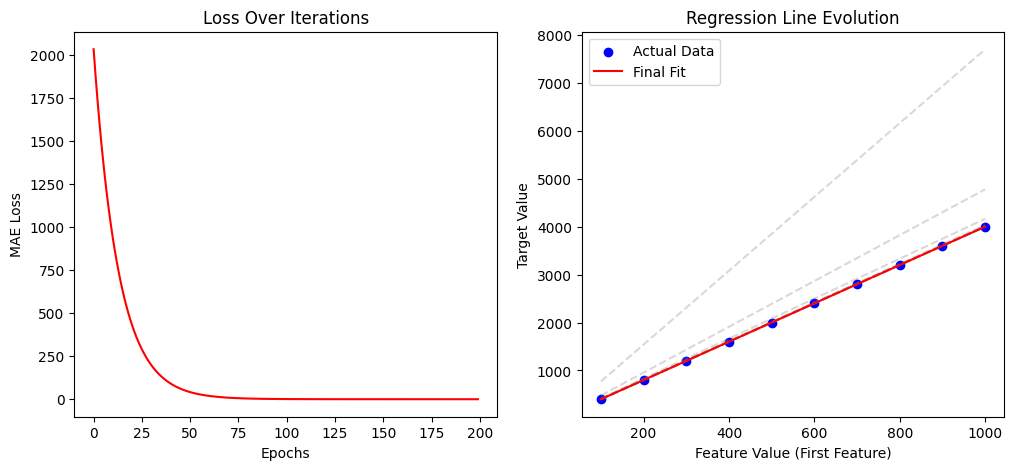

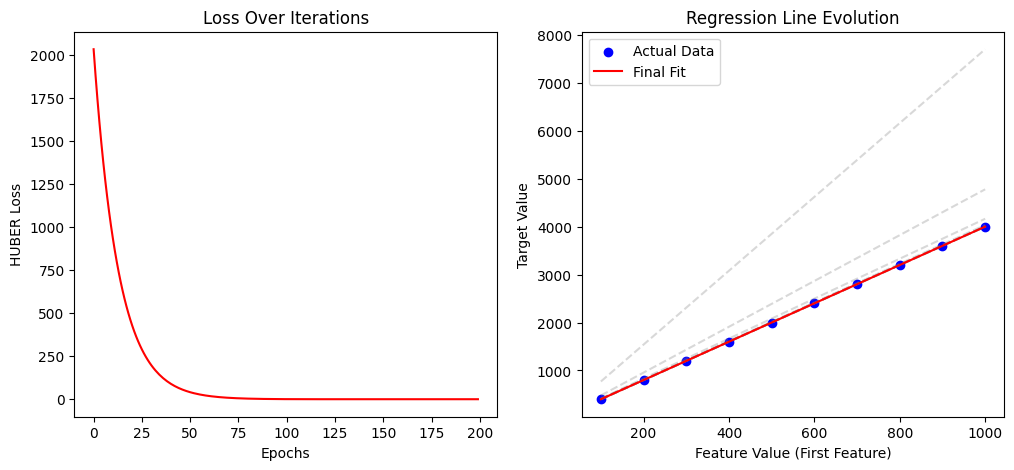

MSE Final Loss: 7.170674183697048e-06
MAE Final Loss: 0.0022916541842675996
Huber Final Loss: 3.585337091848524e-06


In [26]:
#4.3
#skewed data with larger values without feature scaling
X = [[100], [200], [300], [400], [500], [600], [700], [800], [900], [1000]]
y = [400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000]  # y = 4x
model_mse = LinearRegression(learning_rate=0.0000025, epochs=200, cost_function='mse')
model_mse.fit(X, y)
model_mse.visualize_training(X, y)

model_mae = LinearRegression(learning_rate=0.0000025, epochs=200, cost_function='mae')
model_mae.fit(X, y)
model_mae.visualize_training(X, y)

model_huber = LinearRegression(learning_rate=0.0000025, epochs=200, cost_function='huber')
model_huber.fit(X, y)
model_huber.visualize_training(X, y)
print(f"MSE Final Loss: {model_mse.loss_history[-1]}")
print(f"MAE Final Loss: {model_mae.loss_history[-1]}")
print(f"Huber Final Loss: {model_huber.loss_history[-1]}")
#mse wins on speed mae on accuracy, huber manages both

In [ ]:
"""
Property	               MSE	           MAE	                       Huber
Handles small errors	  ✅ Yes	          ❌ No	              ✅ Yes (MSE region)
Handles large outliers	❌ No (explodes)	✅ Yes (linear loss)	✅ Yes (switches to MAE)
Gradient smoothness	    ✅ Smooth	      ❌ Jumps	            ✅ Smooth transition
"""